## Connect GoogleColab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/Shared drives/AI_final_data")

## Import Package

In [ ]:
# packages for image-processing
import cv2
import csv
import random
import time
import numpy as np
import pandas as pd
import matplotlib.image as mpimg # mpimg read image
import matplotlib.pyplot as plt # plt show image
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# chinese font
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

In [ ]:
# Keras deep learning package
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras import utils as np_utils
from keras import backend as K
from keras import optimizers

Using TensorFlow backend.


In [ ]:
# tensorflow deep learning package
# !pip install tensorflow==2.0.0
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

In [ ]:
# print version
print(pd.__version__)
print(tf.__version__)

1.0.4
2.2.0


In [ ]:
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

/device:GPU:0
Num GPUs Available:  1


In [ ]:
# check channel
print(K.image_data_format())

channels_last


In [ ]:
!ls

 2020-06-12_09:19:17
 2020-06-12_09:20:50
 2020-06-12_09:40:42
 2020-06-12_09:50:48
 AI_CUP-C1_P1_TestBaseline_final.pdf
 AImango_A
 AImango_A_GAN
 AImango_B
 AImango_B_GAN
 AImango_C
 AImango_C_GAN
 AImango_C_GAN_size224_noise300_kevin
 AIMango.ipynb
 AIMango_try_weiding.ipynb
 AI_Term_Project.ipynb
 C1-P1_Test
 C1-P1_Test.zip
 C1-P1_Train_Dev_fixed
'Copy1 of AI_Term_Project.ipynb'
'Copy of AI_Term_Project.ipynb'
'Copy of AI_Term_Project.ipynb 的副本'
 dcgan.gif
 dcgan.ipynb
 GAN_Datasets
 generate.ipynb
 h5
 Resized_Train
'Resized_Train (1)'
 resize.ipynb
 submission
 Untitled0.ipynb
 人工智慧_Final_DCGAN.ipynb
 人工智慧_Final_DCGAN_original.ipynb
 人工智慧_Final_DCGAN_original_kevinm.ipynb


## Read Data

In [ ]:
# survey label
label_Survey = pd.read_csv("C1-P1_Train_Dev_fixed/train.csv",encoding="utf8")

In [ ]:
label_Survey.head()

,image_id,label
0,00002.jpg,C
1,00003.jpg,C
2,00004.jpg,B
3,00005.jpg,A
4,00007.jpg,A


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


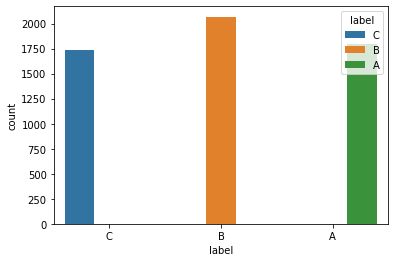

In [ ]:
sns.countplot(label_Survey['label'], hue = label_Survey["label"])

In [ ]:
sector = label_Survey.groupby('label')
sector.size()

label
A    1792
B    2068
C    1740
dtype: int64

## Show Image

In [ ]:
# read image
img = mpimg.imread("C1-P1_Train_Dev_fixed/C1-P1_Train/01420.jpg")
# check image type
type(img)

numpy.ndarray

In [ ]:
# show image's shape
img.shape

(1008, 1344, 3)

In [ ]:
# compress image to 224x224 
res = cv2.resize(img,(224,224),interpolation=cv2.INTER_LINEAR)

In [ ]:
res.shape

(224, 224, 3)

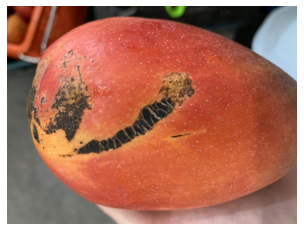

In [ ]:
# show original image
plt.imshow(img)
plt.axis('off')
plt.show()

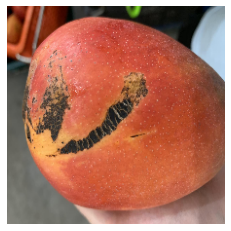

In [ ]:
# show compressed image
plt.imshow(res)
plt.axis('off')
plt.show()

## Build Label and Dataset

In [ ]:
csvfile = open('C1-P1_Train_Dev_fixed/train.csv')
reader = csv.reader(csvfile)

In [ ]:
# read csv label
labels = []
for line in reader:
    tmp = [line[0],line[1]]
    # print tmp
    labels.append(tmp)

csvfile.close() 

In [ ]:
labels[8]

['00010.jpg', 'A']

In [ ]:
x_train = []
y_train = []

In [ ]:
# turn label to int
predict_label = {
    "A":"0",
    "B":"1",
    "C":"2"
}
for i in range(len(labels)):
    labels[i][1] = labels[i][1].replace("A",predict_label["A"])
    labels[i][1] = labels[i][1].replace("B",predict_label["B"])
    labels[i][1] = labels[i][1].replace("C",predict_label["C"])

In [ ]:
predict_label["A"]

'0'

In [ ]:
# randomly read image
a = 0
items= []
import random
for a in range(0,len(labels)):
    items.append(a)
random_set = random.sample(items,len(labels))

In [ ]:
# build dataset
from time import sleep
temp = 0
total = len(labels)

for i in random.sample(items,len(labels)):
    img = cv2.imread("C1-P1_Train_Dev_fixed/C1-P1_Train/" + labels[i][0] )
    if img is None:
        continue
    res = cv2.resize(img,(224,224),interpolation=cv2.INTER_LINEAR)
    # img = cv2.imread("Resized_Train/" + labels[i][0] )
    # if img is None:
    #     continue
    res = img_to_array(res)
    x_train.append(res)    
    y_train.append(labels[i][1])

    # show progress
    temp += 1
    print('\r' + '[Progress]:[%s%s]%.2f%%;' % (
    '█' * int(temp*20/total), ' ' * (20-int(temp*20/total)),
    float(temp/total*100)), end='')
    sleep(0.01)

[Progress]:[███████████████████ ]99.98%;

In [ ]:
y_label_org = y_train

In [ ]:
# transform images to array
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
# transform images to float
for i in range(len(x_train)):
    x_train[i] = x_train[i].astype('float32')

In [ ]:
# print(X[0])
print(type(x_train))
print(x_train.shape)

print(x_train[0].shape)
print(type(x_train[0]))

<class 'numpy.ndarray'>
(5656, 224, 224, 3)
(224, 224, 3)
<class 'numpy.ndarray'>


In [ ]:
# print label
print(y_train[0])
print(type(y_train[0]))

0
<class 'numpy.str_'>


In [ ]:
# one-hot encoding
y_train = np_utils.to_categorical(y_train, num_classes = 3)

In [ ]:
y_train[0]

array([1., 0., 0.], dtype=float32)

In [ ]:
import gc
import glob
from sklearn import model_selection
from keras.callbacks import EarlyStopping, ModelCheckpoint
from scipy.stats import mode

In [ ]:
y_train_label = [0.,0.,0.]

for i in range(0,len(y_train)):
    y_train_label = y_train[i] + y_train_label

In [ ]:
y_train_label

array([1807., 2089., 1760.])

## Build Validation Dataset


In [ ]:
csvfile = open('C1-P1_Train_Dev_fixed/dev.csv')
reader = csv.reader(csvfile)

In [ ]:
# read csv label
labels = []
for line in reader:
    tmp = [line[0],line[1]]
    # print tmp
    labels.append(tmp)

csvfile.close() 

In [ ]:
# turn label to int
for i in range(len(labels)):
    labels[i][1] = labels[i][1].replace("A",predict_label["A"])
    labels[i][1] = labels[i][1].replace("B",predict_label["B"])
    labels[i][1] = labels[i][1].replace("C",predict_label["C"])

In [ ]:
x_val = []
y_val = []

In [ ]:
# randomly read image
a = 0
items= []
import random
for a in range(0,len(labels)):
    items.append(a)
random_set = random.sample(items,len(labels))

In [ ]:
# build dataset
from time import sleep
temp = 0
total = len(labels)

for i in random.sample(items,len(labels)):
    img = cv2.imread("C1-P1_Train_Dev_fixed/C1-P1_Dev/" + labels[i][0] )
    if img is None:
        continue
    res = cv2.resize(img,(224,224),interpolation=cv2.INTER_LINEAR)
    res = img_to_array(res)
    x_val.append(res)    
    y_val.append(labels[i][1])

    # show progress
    temp += 1
    print('\r' + '[Progress]:[%s%s]%.2f%%;' % (
    '█' * int(temp*20/total), ' ' * (20-int(temp*20/total)),
    float(temp/total*100)), end='')
    sleep(0.01)

[Progress]:[███████████████████ ]99.88%;

In [ ]:
x_val = np.array(x_val)
y_val = np.array(y_val)

In [ ]:
# transform images to float
for i in range(len(x_val)):
    x_val[i] = x_val[i].astype('float32')

In [ ]:
# one-hot encoding
y_val = np_utils.to_categorical(y_val, num_classes = 3)

In [ ]:
y_val_label = [0.,0.,0.]

for i in range(0,len(y_val)):
    y_val_label = y_val[i] + y_val_label

In [ ]:
y_val_label

array([243., 293., 264.])

## Build and Train Deep Learning Model

In [ ]:
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, BatchNormalization, Input, ReLU, Add
from keras.layers import MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras.models import Sequential, Model
from keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l2
from keras.optimizers import Adam, Adamax

In [ ]:
#Build AlexNet model
def AlexNet(width, height, depth, classes):
    
    model = Sequential()
    
    #First Convolution and Pooling layer
    model.add(Conv2D(96,(5,5),strides=(2,2),input_shape=(width,height,depth),padding='valid',activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    
    #Second Convolution and Pooling layer
    model.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    
    #Three Convolution layer and Pooling Layer
    model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    
    #Fully connection layer
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000,activation='relu'))
    model.add(Dropout(0.5))
    
    #Classfication layer
    model.add(Dense(3,activation='softmax'))

    return model
  
AlexNet_model = AlexNet(224,224,3,3)
AlexNet_model.summary()
AlexNet_model.compile(optimizer=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),loss = 'categorical_crossentropy',metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 110, 110, 96)      7296      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 384)       1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 256)      

In [ ]:
def VGG16Net():
    
    model = Sequential()
    
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=(224,224,3),padding='same',activation='relu'))
    model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,(3,2),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(1000,activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(3,activation='softmax'))

    from keras.optimizers import Adam
    opt = Adam(lr=0.001)
    model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['acc'])
    
    print(model.summary())
    return model

In [ ]:
from keras.applications.resnet50 import ResNet50
def ResNet_model():    
    FREEZE_LAYERS = 2

    net = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
                input_shape=(224, 224, 3))
    x = net.output
    x = Flatten()(x)

    # Dropout layer
    x = Dropout(0.5)(x)

    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)

    # num_class
    output_layer = Dense(3, activation='softmax', name='softmax')(x)

    # freeze layer
    net_final = Model(inputs=net.input, outputs=output_layer)
    for layer in net_final.layers[:FREEZE_LAYERS]:
        layer.trainable = False
    for layer in net_final.layers[FREEZE_LAYERS:]:
        layer.trainable = True

    # fine-tuning
    net_final.compile(optimizer=Adam(lr=1e-5),
                    loss='categorical_crossentropy', metrics=['acc'])

    print(net_final.summary())

    return net_final

In [ ]:
def CNN_model():
    # CNN Model
    model = Sequential()
    model.add(Conv2D(16,(5,5),
                    input_shape=(224, 224, 3),
                    strides=(1,1),
                    padding='same',
                    activation='relu',
                    ))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None))

    model.add(Conv2D(32,(3,3),
                    strides=(1,1),
                    padding='same',
                    activation='relu',
                    ))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None))

    model.add(Conv2D(64,(3,3),
                    strides=(1,1),
                    padding='same',
                    activation='relu',
                    ))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None))

    model.add(Flatten())
    model.add(Dropout(0.5))

    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(3,activation='softmax'))
    adam = optimizers.adam(lr=0.001)
    model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['acc'])

    print(model.summary())
  
    return model

In [ ]:

def CNN_model_1():

    model = Sequential()

    model.add(Conv2D(16,(3,3),
                    input_shape=(224, 224, 3),
                    padding='same',
                    activation='relu',
                    ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(32,(3,3),
                    padding='same',
                    activation='relu',
                    ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(64,(3,3),
                    padding='same',
                    activation='relu',
                    ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(128,(3,3),
                    padding='same',
                    activation='relu',
                    ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(256,(3,3),
                    padding='same',
                    activation='relu',
                    ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(512,(3,3),
                    padding='same',
                    activation='relu',
                    ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(512,(3,3),
                    padding='same',
                    activation='relu',
                    ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    model.add(GlobalAveragePooling2D())

    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0005)))
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0005)))
    model.add(Dropout(0.5))
    
    model.add(Dense(3,activation='softmax'))

    adam = optimizers.adam(lr=0.001)
    model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['acc'])

    print(model.summary())

    return model

In [ ]:

def CNN_model_2():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu', ))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', ))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu', ))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu', ))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0005)))
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0005)))
    model.add(Dropout(0.5))

    model.add(Dense(3,activation='softmax')) 

    print(model.summary())

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=RMSprop(lr=0.0001),
                metrics=['acc'])

    return model

In [ ]:
def CNN_model_3():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu', ))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', ))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu', ))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu', ))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', ))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.0005)))
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0005)))
    model.add(Dropout(0.5))

    model.add(Dense(3,activation='softmax')) 

    print(model.summary())

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=RMSprop(lr=0.0001),
                metrics=['acc'])

    return model

In [ ]:
x = CNN_model_1()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 16)      64        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 56, 56, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)       

history = model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
# Setting HyperParameters 
batch_size = 48
epochs = 20

In [ ]:

datagen = ImageDataGenerator(
      rotation_range=15,
      horizontal_flip=0.5,
      fill_mode='nearest')

x_train = x_train/255
x_val = x_val/255

datagen.fit(x_train)
datagen.fit(x_val)

In [ ]:
model = CNN_model_1()

model_vgg = model.fit_generator(
                      datagen.flow(x_train, y_train, batch_size=batch_size),
                      shuffle = True,
                      validation_data = (x_val, y_val), 
                      steps_per_epoch = len(x_train) / batch_size,
                      epochs = epochs, 
                      verbose = 1
                      )

gc.collect()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 112, 112, 16)      64        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 56, 56, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 64)       

21559

In [ ]:
epochs =  10
batch_size = 48

model_vgg = model.fit_generator(
                      datagen.flow(x_train, y_train, batch_size=batch_size),
                      shuffle = True,
                      validation_data = (x_val, y_val), 
                      steps_per_epoch = len(x_train) / batch_size,
                      epochs = epochs, 
                      verbose = 1
                      )

Epoch 1/10
118/117 [==============================] - 68s 577ms/step - loss: 0.5410 - acc: 0.8092 - val_loss: 0.5852 - val_acc: 0.7962
Epoch 2/10
118/117 [==============================] - 67s 570ms/step - loss: 0.5368 - acc: 0.8030 - val_loss: 0.6045 - val_acc: 0.7700
Epoch 3/10
118/117 [==============================] - 67s 569ms/step - loss: 0.5218 - acc: 0.8085 - val_loss: 0.6967 - val_acc: 0.7387
Epoch 4/10
118/117 [==============================] - 66s 562ms/step - loss: 0.5025 - acc: 0.8135 - val_loss: 0.7208 - val_acc: 0.7462
Epoch 5/10
118/117 [==============================] - 66s 563ms/step - loss: 0.5050 - acc: 0.8135 - val_loss: 0.6184 - val_acc: 0.7725
Epoch 6/10
118/117 [==============================] - 67s 566ms/step - loss: 0.4886 - acc: 0.8181 - val_loss: 0.5865 - val_acc: 0.7788
Epoch 7/10
118/117 [==============================] - 67s 567ms/step - loss: 0.4744 - acc: 0.8205 - val_loss: 0.6126 - val_acc: 0.7750
Epoch 8/10
118/117 [==============================] - 6

In [ ]:
epochs = 20
model_vgg = model.fit_generator(
                      datagen.flow(x_train, y_train, batch_size=batch_size),
                      shuffle = True,
                      validation_data = (x_val, y_val), 
                      steps_per_epoch = len(x_train) / batch_size,
                      epochs = epochs, 
                      verbose = 1
                      )

Epoch 1/5
118/117 [==============================] - 68s 575ms/step - loss: 0.3218 - acc: 0.8920 - val_loss: 0.8713 - val_acc: 0.6938
Epoch 2/5
118/117 [==============================] - 67s 568ms/step - loss: 0.3207 - acc: 0.8872 - val_loss: 0.7177 - val_acc: 0.7600
Epoch 3/5
118/117 [==============================] - 67s 565ms/step - loss: 0.2868 - acc: 0.9065 - val_loss: 0.8229 - val_acc: 0.7538
Epoch 4/5
118/117 [==============================] - 66s 563ms/step - loss: 0.2802 - acc: 0.9028 - val_loss: 0.7988 - val_acc: 0.7175
Epoch 5/5
118/117 [==============================] - 67s 564ms/step - loss: 0.2800 - acc: 0.9134 - val_loss: 1.0240 - val_acc: 0.7250


In [ ]:
acc = model_vgg.history['val_acc']
print(acc[-1])
model.save('h5/'+'model_1_' + 'acc:' + str(acc[-1]) + '_.h5')

0.7250000238418579


## Plot Model Learning and Testing Result

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


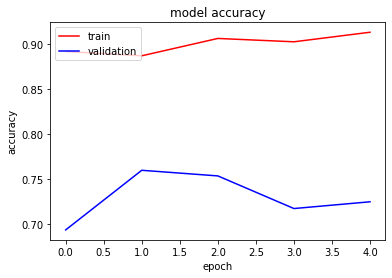

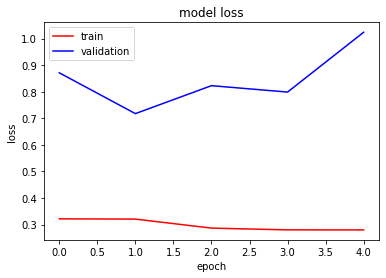

In [ ]:
#Summarize history for accuracy
plt.plot(model_vgg.history['acc'],'r')
plt.plot(model_vgg.history['val_acc'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(model_vgg.history['loss'],'r')
plt.plot(model_vgg.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
test_dataset = os.listdir('Program Exam_Mango Grade Classification')
print(len(test_dataset))

60


In [ ]:
x_test = []
images_id = []

In [ ]:
# build dataset
from time import sleep
temp = 0
total = len(test_dataset)

for fname in test_dataset:
    img = cv2.imread("Program Exam_Mango Grade Classification/" + fname )
    if img is None:
        continue
    res = cv2.resize(img,(224,224),interpolation=cv2.INTER_LINEAR)
    res = img_to_array(res)
    x_test.append(res)
    images_id.append(fname)    


    # show progress
    temp += 1
    print('\r' + '[Progress]:[%s%s]%.2f%%;' % (
    '█' * int(temp*20/total), ' ' * (20-int(temp*20/total)),
    float(temp/total*100)), end='')
    sleep(0.01)

[Progress]:[████████████████████]100.00%;

In [ ]:
print(len(images_id))
print(len(x_test))

60
60


In [ ]:
x_test = np.array(x_test)
for i in range(len(x_test)):
    x_test[i] = x_test[i].astype('float32')

In [ ]:
x_test = x_test/255

In [ ]:
# model_0 = keras.models.load_model('h5/model_1_acc:0.7962499856948853_.h5')

# model_1 = keras.models.load_model('h5/model_2_acc:0.793749988079071_.h5')

# model_2 = keras.models.load_model('h5/model_2_acc_0.795634925365448_.h5')   

In [ ]:
model_0 = keras.models.load_model('h5/model_1_acc:0.7962499856948853_.h5')

model_1 = keras.models.load_model('h5/model_2_acc:0.793749988079071_.h5')

model_2 = keras.models.load_model('h5/AlexNet_acc_0.7237499952316284_.h5') 


In [ ]:
print(model_0.predict(x_test))
print(model_1.predict(x_test))
print(model_2.predict(x_test))
max_index_col_0 = np.argmax(model_0.predict(x_test), axis=1)
print(max_index_col_0)
max_index_col_1 = np.argmax(model_1.predict(x_test), axis=1)
print(max_index_col_1)
max_index_col_2 = np.argmax(model_2.predict(x_test), axis=1)
print(max_index_col_2)

[[9.5420253e-01 4.5783877e-02 1.3658942e-05]
 [9.5443290e-01 4.5411237e-02 1.5589093e-04]
 [9.9552059e-01 4.4792509e-03 9.6420564e-08]
 [8.4332478e-01 1.5647727e-01 1.9798381e-04]
 [8.9352268e-01 1.0643539e-01 4.1955951e-05]
 [7.5633627e-01 2.3065205e-01 1.3011722e-02]
 [9.5018482e-01 4.9801968e-02 1.3164076e-05]
 [8.3358580e-01 1.6638488e-01 2.9314262e-05]
 [9.8560691e-01 1.4377009e-02 1.6133163e-05]
 [9.5964563e-01 4.0276174e-02 7.8111836e-05]
 [8.2787901e-01 1.6146955e-01 1.0651547e-02]
 [6.0847586e-01 3.8776571e-01 3.7584347e-03]
 [9.6282500e-01 3.7068117e-02 1.0685497e-04]
 [9.8672545e-01 1.3253810e-02 2.0684247e-05]
 [6.7690516e-01 3.2304019e-01 5.4749835e-05]
 [9.2096370e-01 7.8666933e-02 3.6928628e-04]
 [9.8054105e-01 1.9427186e-02 3.1820149e-05]
 [9.4961053e-01 5.0345756e-02 4.3661814e-05]
 [9.9806851e-01 1.9315640e-03 3.1802866e-08]
 [4.1227740e-01 4.6458504e-01 1.2313757e-01]
 [9.5966345e-05 1.8212259e-02 9.8169172e-01]
 [9.7993565e-01 2.0042354e-02 2.1921900e-05]
 [8.003864

In [ ]:
Voting = []
for i in range(len(max_index_col_0)):
  one = 0
  two = 0
  zero = 0
  if max_index_col_0[i] == 0 : zero = zero + 1 
  elif  max_index_col_0[i] == 1: one = one + 1 
  elif max_index_col_0[i] == 2: two = two +1

  if max_index_col_1[i] == 0 : zero = zero + 1 
  elif  max_index_col_1[i] == 1: one = one + 1 
  elif max_index_col_1[i] == 2: two = two +1

  if max_index_col_2[i] == 0 : zero = zero + 1 
  elif  max_index_col_2[i] == 1: one = one + 1 
  elif max_index_col_2[i] == 2: two = two +1

  if zero >= one and zero >= two:
    Voting.append("1")
  elif one >= zero and one >= two:
    Voting.append("2")
  elif two >= zero and two >= one:
    Voting.append("3")

print(Voting)

['1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '2', '2', '1', '1', '1', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '2', '3', '3', '2', '3', '3', '2', '2', '3', '3', '3', '2', '3', '3', '2', '2', '3', '3', '2', '3', '3']


In [ ]:
tmp = []
for i in range(len(images_id)):
    tmp.append( (int(images_id[i].split('.')[0]), Voting[i]) )
sortedlist = sorted(tmp, key=lambda x: x[0])

In [ ]:
print(sortedlist)

[(1, '3'), (2, '1'), (3, '2'), (4, '1'), (5, '1'), (6, '3'), (7, '3'), (8, '3'), (9, '3'), (10, '1'), (11, '3'), (12, '3'), (13, '2'), (14, '1'), (15, '1'), (16, '3'), (17, '3'), (18, '3'), (19, '2'), (20, '2'), (21, '1'), (22, '3'), (23, '3'), (24, '3'), (25, '3'), (26, '2'), (27, '1'), (28, '2'), (29, '1'), (30, '1'), (31, '3'), (32, '2'), (33, '3'), (34, '1'), (35, '3'), (36, '3'), (37, '3'), (38, '3'), (39, '1'), (40, '2'), (41, '1'), (42, '2'), (43, '1'), (44, '2'), (45, '3'), (46, '3'), (47, '3'), (48, '1'), (49, '3'), (50, '1'), (51, '2'), (52, '3'), (53, '1'), (54, '3'), (55, '2'), (56, '3'), (57, '1'), (58, '1'), (59, '1'), (60, '3')]


In [ ]:
# Make predictions on test images, write out sample submission 
from tqdm import tqdm

with open('./submission/Alex.csv', 'w') as file:
    out_str = ""
    out_str += 'ImageID'
    out_str += ','
    out_str += 'PredictedLabel'
    out_str += '\n'
    for fname, label in tqdm(sortedlist): 
        # out_str += fname + '.jpg'
        out_str += str(int(fname))
        out_str += ","
        out_str += label
        out_str += '\n'
    file.write(out_str)

file.close()


100%|██████████| 60/60 [00:00<00:00, 46457.12it/s]
